## 概率判别式模型

三种分类方法：

(1) Discriminant function（判别函数）：直接把输入 x 判归某一个类别

(2) Generative model（生成模型）：通过计算 joint distribution 或 class-conditional distribution$p(x|C_k)$而计算 posterior $p(C_k|x)$

(3)Discriminant model（判别模型）：直接计算 posterior $p(C_k|x)$

## 4.3.2 Logistic 回归

在⼀些相当⼀般的假设条件下，类别C1的后验概率可写成作⽤在特征向量$\phi$的线性函数上的logistic sigmoid函数的形式:
$$p(C_1|\phi)=\sigma(w^T\phi)$$
对于⼀个M维特征空间ϕ，这个模型有M个可调节参数。不同于最大似然方法确定高斯类条件概率密度时参数随M二次增长($\frac{M(M+5)}{2}$)，这里对参数数量M呈线性依赖
$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$
$$p(t|w)=\prod_{n=1}^Ny_n^{t_n}(1-y_n)^{1-t_n}$$
对似然函数去负对数就产生了交叉熵误差函数：
$$E(w)=-ln(p|t)=-\sum_{n=1}^N{t_nlny_n+(1-t_n)ln(1-y_n)}$$

## 4.3.3 牛顿迭代法

最小化$E(w)$时令其梯度为0：$\nabla E(w)=\sum_{n=1}^N(y_n-t_n)\phi_n=0$

在第3章讨论线性回归模型的时候，在⾼斯噪声模型的假设的情况下，最⼤似然解有解析解。这是因为对数似然函数为参数向量w的⼆次函数。对于logistic回归来说，不再有解析解了，因为logistic sigmoid函数是⼀个⾮线性函数。然⽽，函数形式不是⼆次函数并不是本质的原因。精确地说，正如我们将要看到的那样，误差函数是凸函数，因此有⼀个唯⼀的最⼩值。此外，误差函数可以通过⼀种⾼效的迭代⽅法求出最⼩值，这种迭代⽅法基于Newton-Raphson迭代最优化框架，使⽤了对数似然函数的局部⼆次近似。

$$w_{new}=w_{old}-H_{-1}\nabla E(w)$$
$$H=\nabla\nabla E(w)=\sum_{n=1}^Ny_n(1-y_n)\phi_n\phi_n^T=\Phi^TR\Phi$$

R为nxn的对角矩阵，其元素为$R_nn=y_n(1-y_n)$,这样更新过程变为：

$$\begin {align}
{new}&=w_{old}-(\Phi^TR\Phi)^{-1}\Phi^T(y-t)\\
     &=(\Phi^TR\Phi)^{-1}\Phi^TR\Phi w_{old}-\Phi^T(y-t) \end {align}$$

由于权矩阵R不是常
量，⽽是依赖于参数向量w，因此我们必须迭代地应⽤规范⽅程，每次使⽤新的权向量w计
算⼀个修正的权矩阵R。


In [1]:
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from prml.features import PolynomialFeatures
from prml.linear import (
    BayesianLogisticRegressor,
    LeastSquaresClassifier,
    LinearDiscriminantAnalyzer,
    LogisticRegressor,
    Perceptron,
    SoftmaxRegressor
)
np.random.seed(1234)

In [2]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

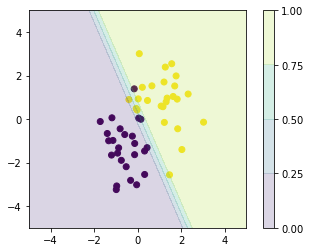

In [3]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LogisticRegressor()
model.fit(X_train, y_train)
y = model.proba(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.3.4 softmax回归

我们对于多分类的⽣成式模型的讨论中，后验概率由特征变量的线性函数的softmax变换给出，即：
$$p(C_k|\phi)=y_k{\phi}=\frac{exp(a_k)}{\sum_jexp(a_k)}$$
其中，$a_k=w^T_k\phi$
$$E(w_1,...,w_k)=-lnp(T|w_1,...,w_k)=-\sum_{n=1}^N\sum_{k=1}^Kt_{nk}lny_{nk}$$

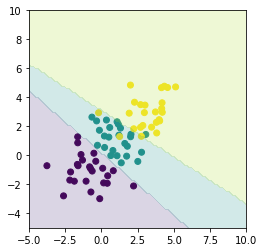

In [5]:
x_train, y_train = create_toy_data(add_class=True)
x1, x2 = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x = np.array([x1, x2]).reshape(2, -1).T

feature = PolynomialFeatures(1)
X_train = feature.transform(x_train)
X = feature.transform(x)

model = SoftmaxRegressor()
model.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y = model.classify(X)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1, x2, y.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.3.5 prohit回归

一般线性模型框架:$$p(t=1|a)=f(a)$$
其中$a=w^T\phi$
对于每个输入$\phi_n$,计算$a_n$,然后设定目标值$$\begin{cases}t_n=1,&\mbox{if}  a_n\ge\theta\\t_n=0,&\mbox{other}\end{cases}$$
如果$\theta$从概率密度中抽取，那么对应的激活函数由累积分布函数给出$$f(a)=\int_{-\infty}^ap(\theta)d\theta$$

作为⼀个具体的例⼦，假设概率密度p(θ)是零均值、单位⽅差的⾼斯概率密度。对应的累积分布函数为
$$\begin{align}\Phi(a)&=\int_{-\infty}^a\mathcal N(\theta|0,1)d\theta\\&=\frac{1}{2}\bigg\{1+erf(\frac{a}{\sqrt2})\bigg\}\\\end{align}$$

其中误差函数$$erf(a)=\frac{2}{\sqrt\pi}\int_0^aexp(-\theta^2)d\theta$$
在实际
应⽤中，使⽤probit回归得到的结果倾向于与logistic回归得到的结果类似

## 4.4 Laplace 近似

后验概率不再是高斯分布时，需要以某种方式来近似,先考虑单一变量z，分布$p(z)$定义为：$p(z)=\frac{1}{Z}f(z)$,其中$Z=\int f(z)dz$

目标是找到一个高斯分布的近似$q(z)$,其中心为$p(z)$的众数。首先，寻找$f(z)$的驻点$$\frac{df(z)}{dz}\bigg |_{z=z_0}=0$$
然后泰勒展开$$lnf(z)\simeq lnf(z_0)-\frac{1}{2}A(z-z_0)^2$$
其中$$A=-\frac{d^2}{dz^2}lnf(z_0)\bigg |_{z=z_0}$$
在$z_0$处有概率分布的局部最大值，所以$f(z)\simeq f(z_0)exp{\frac{A}{2}(z-z_0)^2}$
指数部分为z的平方函数，所以可以使用归一化的高斯分布近似得到
$$q(z)\simeq (\frac{A}{2\pi})^\frac{1}{2}exp{\frac{A}{2}(z-z_0)^2}$$
对于高维空间有$$q(z)=\frac{|A|^{\frac{1}{2}}}{(2\pi)^{\frac{M}{2}}}exp{-\frac{1}{2}(z-z_0)^TA(z-z_0)}=N(z|z_0,A^{-1})$$

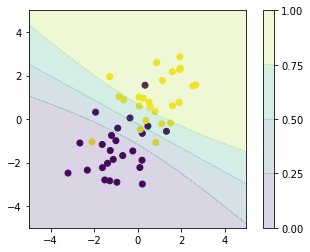

In [8]:
#使用Laplace近似求解bayesian logistic 回归的参数
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeatures(degree=1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = BayesianLogisticRegressor(alpha=1.)
model.fit(X_train, y_train, max_iter=1000)
y = model.proba(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), np.linspace(0, 1, 5), alpha=0.2)
plt.colorbar()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 4.5 贝叶斯logistic回归

计算后验概率分布需要对先验概率分布于似然函数的乘积进⾏归⼀化，⽽似然函数本⾝由⼀系列logistic sigmoid函数的乘积组成，每个数据点都有⼀个logistic sigmoid函数。对于预测分布的计算类似地也是⽆法处理的。
这⾥我们考虑使⽤拉普拉斯近似来处理贝叶斯logistic回归的问题
选择高斯先验：$$p(w)=N(w|m_0,s_0)$$

其中m0和S0是固定的超参数。 w的后验概率分布为
$$p(w|t)\propto p(w)p(t|w)$$
似然函数为：$$ p(t|w)=\prod^N_{n=1}y_n^{t_n}{1-y_n}^{1-t_n}$$
对数似然：
$$lnp(w|t)=\frac{1}{2}(w-m_0)^T\mathbf s_0^-1(w-m_0)+\sum_{n=1}^N{t_ny_n+(1-t_n)ln(1-y_n)}+\text {常数}$$
其中$y_n=\sigma(w^T\phi_n)$,最大化后验概率得到$w_{MAP}$，其定义了高斯分布的均值，由laplace近似可知：
$$\mathbf S_N^{-1}=-\nabla\nabla lnp(w|t)=S_0^-1+\sum^N_{n=1}y_n(1-y_n)\phi_n\phi_n^T$$
于是后验概率分布的高斯近似为:$$q(w)=N(w|w_{MAP},\mathbf S_N)$$


## 4.5.1 预测分布

对一个新的$\phi(x)$，类别$C_1$的预测分布可通过对$p(w|t)$积分得到
$$P(C_1|\phi,t)=\int p(C_1|\phi,w)p(w|t)dw\simeq \int \sigma(w^T\phi)q(w)dw$$
然后完成marginalization,也就是计算logistic函数与高斯分布的卷积。


引入狄拉克函数:$$\delta(x)=\begin{cases}+\infty,&x=0\\0,&otherwise\end{cases}$$
导数为：
$$\int_{-\infty}^{\infty}\delta(x)dx=1$$

于是有$$\sigma(w^T\phi)=\int\delta(a-w^T\phi)\sigma(a)da$$
令$$p(a)=\int \delta(a-w^T\phi)q(w)dw$$
预测分布就可以写成:
$$\int\sigma(w^T\phi)q(w)dw=\int\sigma(a)p(a)da$$

注意到Delta函数给w施加了⼀个线性限制，因此在所有与ϕ正交的⽅向
上积分，就得到了联合概率分布q(w)的边缘分布。由于q(w)是⾼斯分布，因此根据2.3.2节，我
们知道边缘概率分布也是⾼斯分布。我们可以通过计算各阶矩然后交换a和w的积分顺序的⽅式
计算均值和协⽅差，即:

$$\mu_a=\mathbb E[a]=\int p(a)ada=\int q(w)w^T\phi dw=w^T_{MAP}\phi$$

$$\begin{align}\sigma^2_a&=\int p(a){a^2-\mathbb E[a]^2}da\\&=\int q(w)\{(w^T\phi)^2-(m^T_N-\phi)^2\}dw=\phi^TS_N\phi\\ \end{align}$$

预测分布就变为:
$$p(\mathcal C_1|t)=\int \sigma(a)p(a)da=\int \sigma(a)\mathcal N(a|\mu_a,\sigma_a^2)da$$
关于a的积分表⽰⼀个⾼斯分布和⼀个logistic sigmoid函数的卷积，不能够解析地求值，但是可用逆probit函数Φ(a)的⾼度相似性来获得⼀个较好的近似